In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd 
import numpy as np 

In [2]:
cali = fetch_california_housing()

X = cali.data
y = cali.target

print(X.shape, y.shape)


(20640, 8) (20640,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #since the trained model is being saved, if this is on shuffle=True, it could lead to overfitting

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16512, 8) (16512,) (4128, 8) (4128,)


In [199]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib

## Creating Pipeline, Training Model, and Saving Model

### No Need to ReTrain the data the if the .model files are generated once, skip the model blocks and run the next blocks

### Model: KNN

In [201]:
pipe_KNN = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=10000)),
    ('model', KNeighborsRegressor(weights='distance', n_neighbors=5))
    
])

pipe_KNN.fit(X_train, y_train)

joblib.dump(pipe_KNN, 'pipe_KNN.model')


['pipe_KNN.model']

### Model: LINEAR

In [203]:
pipe_Linear = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=10000)),
    ('model', LinearRegression())
])
pipe_Linear.fit(X_train, y_train)
joblib.dump(pipe_Linear, 'pipe_Linear.model')


['pipe_Linear.model']

### RANDOM FOREST REGRESSOR

In [205]:
pipe_RandomForestRegressor = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=10000)),
    ('model', RandomForestRegressor())
])
pipe_RandomForestRegressor.fit(X_train, y_train)
joblib.dump(pipe_RandomForestRegressor, 'pipe_RandomForestRegressor.model')

['pipe_RandomForestRegressor.model']

### Model: GRADIENT BOOSTING REGRESSOR

In [206]:
pipe_GradientBoostingRegressor = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=10000)),
    ('model', GradientBoostingRegressor())
])
pipe_GradientBoostingRegressor.fit(X_train, y_train)
joblib.dump(pipe_GradientBoostingRegressor, 'pipe_GradientBoostingRegressor.model')


['pipe_GradientBoostingRegressor.model']

### LOADING MODELS AND PREDICTING RESULTS

In [209]:
# Loading Models
pipe_KNN = joblib.load('pipe_KNN.model')
pipe_Linear = joblib.load('pipe_Linear.model')
pipe_GradientBoostingRegressor = joblib.load('pipe_GradientBoostingRegressor.model')
pipe_RandomForestRegressor = joblib.load('pipe_RandomForestRegressor.model')

# Predicting Y
pred_KNN = pipe_KNN.predict(X_test)
pred_Linear = pipe_Linear.predict(X_test)
pred_GradientBoostingRegressor = pipe_GradientBoostingRegressor.predict(X_test)
pred_RandomForestRegressor = pipe_RandomForestRegressor.predict(X_test)

### PLOTING THE PREDICTION OF MODEL

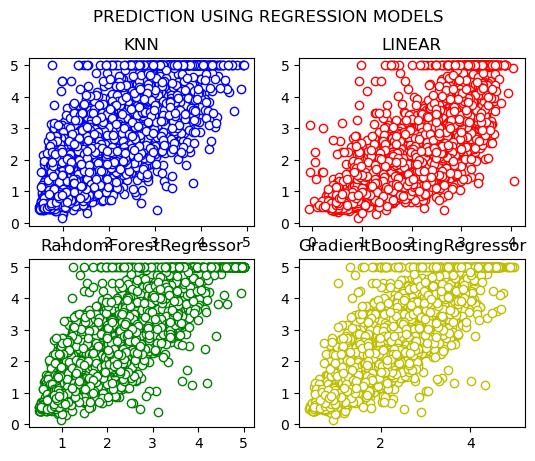

In [211]:
import matplotlib.pyplot as plt 

plt.subplot(2,2,1)
plt.scatter(pred_KNN, y_test, c='w', edgecolors='blue') 
plt.title("KNN")

plt.subplot(2,2,2)
plt.scatter(pred_Linear, y_test, c='w', edgecolors='red')
plt.title("LINEAR")

plt.subplot(2,2,3)
plt.scatter(pred_RandomForestRegressor, y_test, c='w', edgecolors='g')
plt.title("RandomForestRegressor")

plt.subplot(2,2,4)
plt.scatter(pred_GradientBoostingRegressor, y_test, c='w', edgecolors='y')
plt.title("GradientBoostingRegressor")

plt.suptitle('PREDICTION USING REGRESSION MODELS')
plt.show()

In [213]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mape_KNN = mean_absolute_percentage_error(y_test, pred_KNN)
mape_Linear = mean_absolute_percentage_error(y_test, pred_Linear)
mape_RandomForestRegressor = mean_absolute_percentage_error(y_test, pred_RandomForestRegressor)
mape_GradientBoostingRegressor = mean_absolute_percentage_error(y_test, pred_GradientBoostingRegressor) 

print("MEAN ABSOULUTE PERCENTAGE ERROR")
f"KNN: {mape_KNN:0.3f}, LINEAR: {mape_Linear:0.3f}, RandomForestRegressor: {mape_RandomForestRegressor:0.3f},  GradientBoostingRegressor: {mape_GradientBoostingRegressor:0.3f}"

MEAN ABSOULUTE PERCENTAGE ERROR


'KNN: 0.276, LINEAR: 0.298, RandomForestRegressor: 0.226,  GradientBoostingRegressor: 0.231'

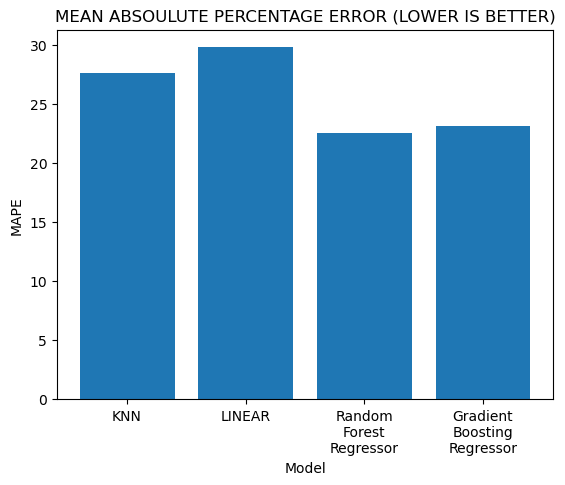

In [215]:
plt.bar(
    ['KNN', 'LINEAR', 'Random\nForest\nRegressor', 'Gradient\nBoosting\nRegressor'], 
    [mape_KNN*100, mape_Linear*100, mape_RandomForestRegressor*100, mape_GradientBoostingRegressor*100]
)
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.title('MEAN ABSOULUTE PERCENTAGE ERROR (LOWER IS BETTER)')
plt.show()


In [217]:
final_data = {'KNN':pred_KNN, 
              'LINEAR': pred_Linear,
              'RANDOM_FOREST_REGRESSOR': pred_RandomForestRegressor,
              'GRADIENT_BOOSTING_REGRESSOR': pred_GradientBoostingRegressor,
              'Actual': y_test
             }

In [219]:
pd.DataFrame(final_data)

,KNN,LINEAR,RANDOM_FOREST_REGRESSOR,GRADIENT_BOOSTING_REGRESSOR,Actual
0,0.645308,1.083362,1.08218,0.966433,1.656
1,1.071076,1.459010,1.38545,1.289245,1.261
2,0.720175,0.830603,0.82909,0.931820,0.944
3,0.702474,1.235000,0.94561,1.083480,0.919
4,1.014252,1.153971,1.16283,1.070924,1.243
...,...,...,...,...,...
4123,0.908956,0.554515,0.67052,0.648551,0.781
4124,1.368706,0.588814,0.89210,0.933860,0.771
4125,0.699349,0.613469,0.83920,0.744079,0.923
4126,0.898083,0.803562,0.88442,0.834650,0.847
